In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install sklearn

In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [6]:
data=pd.read_csv('/home/aayush/heart stroke/code/kaggle healthcare-dataset-stroke-data.csv')

In [7]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# performing EDA(Exploratory Data Analysis)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# I can see that there are some null values in the bmi attribute

In [10]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# bmi has 201 null values for 5110 tuples

In [13]:
data.shape


(5110, 12)

In [14]:
# As there are 5110 tuples out of which only 201 tuples have a null value for the bmi attribute so I can
# either delete the 201 tuples or fill it with 'mean' values. Both the ways will be equally efficient.
# I move ahead by replacing the null values of bmi attribute with the mean values.

In [15]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [16]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [17]:
 # So the average value of bmi is 28.893237

In [18]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [19]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
# Now I can see that there are 0 null values across all attributes.
# Now I should start feature selection i.e., select the attriutes which can establish a pattern 
# for predicting the target variable.
# occurrence of stroke doesn't depend upon "id" so I will drop it.

In [21]:
data.drop('id',axis=1,inplace=True)

In [22]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Removing the Outliers-

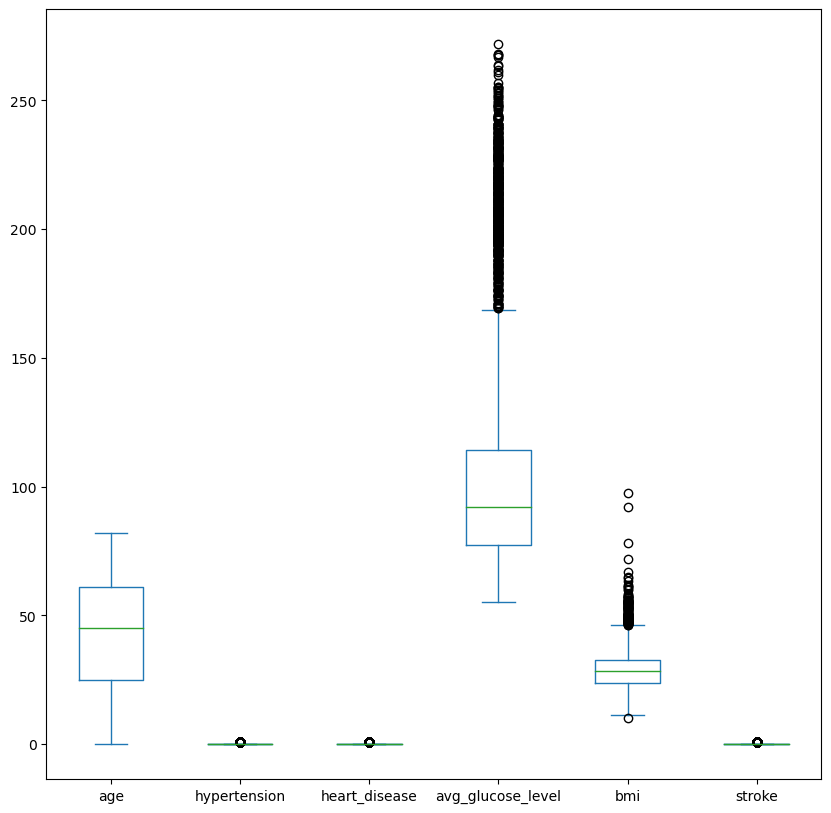

In [23]:
data.plot(kind='box')
plt.show()

In [24]:
 # I obvserve that the data has a lot of outliers in avg_glucose_level and bmi 

In [25]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [26]:
# though the max value of avg_glucose_level is 271.740000, it is not something which is impossible in the medical world
# this means that this value is not an outlier/error.
# So I decide to keep the values because if everything would have been normal they won't have a stroke

In [27]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [28]:
# If I decide to remove outliers, I will end up removing 1277 tuples, Not a good idea.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Label Encoding

In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [31]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [32]:
 # I will apply encoding to string values for attribute 'work_type'

In [33]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [34]:
gender=enc.fit_transform(data['gender'])

In [35]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [36]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [37]:
# was just checking if my encoding technique is working or not

In [38]:
work_type=enc.fit_transform(data['work_type'])

In [39]:
Residence_type=enc.fit_transform(data['Residence_type'])

In [40]:
ever_married=enc.fit_transform(data['ever_married'])

In [41]:
list(work_type)

[2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 2,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 3,
 2,
 0,
 0,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 4,
 2,
 3,
 3,
 0,
 2,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 3,
 0,
 2,
 0,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 3,
 2,
 4,


In [42]:
list(Residence_type)

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [43]:
list(ever_married)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [44]:
#applying encoding on dataset permanently i.e., inplace

In [45]:
data['gender']=gender
data['smoking_status']=smoking_status
data['work_type']=work_type
data['Residence_type']=Residence_type
data['ever_married']=ever_married

In [46]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [47]:
# all the string data has now been encoded.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [49]:
# all attributes are in int, float data type.

# Splitting the data for train & test

X is features, Y is target variable

In [50]:
# X ---train_X,test_X ratio- 80/20
# Y ---train_Y,test_y ratio- 80/20
# axis=1 is for columns and axis=2 is for rows

In [51]:
X=data.drop('stroke',axis=1) 

In [52]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [53]:
Y=data['stroke'] 

In [54]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [57]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [58]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [59]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [60]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

# Going ahead with Normalization of data

In [61]:
# In Normalization, I will scale down the varied data into a particular range

In [62]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std=StandardScaler()

In [65]:
X_train_std=std.fit_transform(X_train)

In [66]:
X_test_std=std.transform(X_test)

In [67]:
import pickle
import os 

In [68]:
# saving the scaler object for web deployment purpose

In [69]:
scaler_path = os.path.join('/home/aayush/heart stroke/code','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [70]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

# Training using 6 ML Algorithms-

# 1. Decision tree algorithm-

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [72]:
# training decision tree on X_train, Y_train

In [73]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [74]:
dt.feature_importances_

array([0.04328383, 0.18561187, 0.01954519, 0.02113875, 0.00296279,
       0.04102032, 0.04481435, 0.32945721, 0.23602038, 0.07614532])

In [75]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [76]:
# I see that avg_glucose_level, bmi, age are 3 most important features

In [77]:
Y_pred_dt=dt.predict(X_test)

In [78]:
#comparing the result of decision tree with actual results(Y_test)

In [79]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [80]:
Y_pred_dt

array([0, 0, 1, ..., 1, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
ac_dt=accuracy_score(Y_test,Y_pred_dt)

In [83]:
ac_dt

0.9090019569471625

In [84]:
# 91% accuracy in Decision-tree algorithm, The accuracy can be further improved by hyper-parameter tuning.

# 2. Logistic Regression Algorithm-

In [85]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [86]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [87]:
Y_pred_lr=lr.predict(X_test_std)

In [88]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
#comparing the result of decision tree with actual results(Y_test)

In [90]:
ac_lr= accuracy_score(Y_test, Y_pred_lr)

In [91]:
ac_lr

0.9471624266144814

In [92]:
# 94.7% accuracy in Logistic regression algorithm.

# 3. K-Nearest Neighbors(KNN)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [94]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [95]:
Y_pred_knn= knn.predict(X_test_std)

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [96]:
Y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
ac_knn= accuracy_score(Y_test, Y_pred_knn)

In [98]:
ac_knn

0.9452054794520548

In [99]:
# 94.5% accuracy score in KNN.

# 4. Random Forest algorithm-

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [101]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [102]:
Y_pred_rf= rf.predict(X_test_std)

In [103]:
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
ac_rf= accuracy_score(Y_test, Y_pred_rf)

In [105]:
ac_rf

0.9471624266144814

In [106]:
# 94.6% accuracy in random forest algorithm

# Support Vector Machine (SVM)-

In [107]:
from sklearn.svm import SVC

In [108]:
sv=SVC()

In [109]:
sv.fit(X_train_std, Y_train)

SVC()

In [110]:
Y_pred_sv= sv.predict(X_test_std)

In [111]:
Y_pred_sv

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
ac_sv= accuracy_score(Y_test, Y_pred_sv)

In [113]:
ac_sv

0.9471624266144814

In [114]:
# svm has 94.7% accuracy

# 6. XGB Classifier-

In [115]:
!pip install xgboost

In [128]:
from xgboost import XGBClassifier
xgc = XGBClassifier()

In [129]:
xgc.fit(X_train_std, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
Y_pred_xgc= xgc.predict(X_test_std)

In [131]:
Y_pred_xgc

array([0, 0, 0, ..., 0, 1, 0])

In [132]:
ac_xgc= accuracy_score(Y_test, Y_pred_xgc)

In [133]:
ac_xgc

0.9461839530332681

In [122]:
# XGB classifer has 94.5% accuracy.

# Plotting-

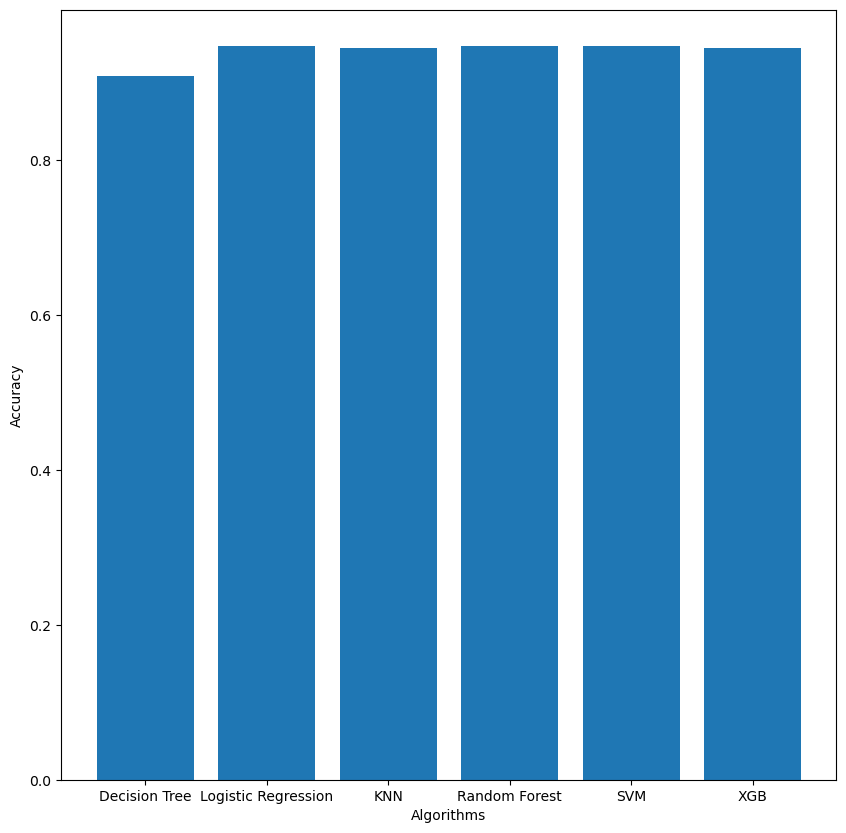

In [123]:
plt.bar(x=['Decision Tree','Logistic Regression','KNN','Random Forest','SVM','XGB'],height=[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,ac_xgc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [124]:
# saving SVM model for web deployment

In [125]:
import joblib
model_path = os.path.join('/home/aayush/heart stroke/code/','models/sv.sav')
joblib.dump(sv,model_path)

['/home/aayush/heart stroke/code/models/sv.sav']

In [126]:
model_path = os.path.join('/home/aayush/heart stroke/code/','models/dt.sav')
joblib.dump(dt,model_path)

['/home/aayush/heart stroke/code/models/dt.sav']